<a href="https://colab.research.google.com/github/swarajgadgul/LGMVIP--DataScience/blob/main/iris_flower_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LGM-VIP Data science intern

# Task1: Iris flower classification
## Submitted by: Swaraj gadgul

  This particular ML project is usually
referred to as the "Hello World" of Machine
Learning. The iris flowers dataset contains
numeric attributes, and it is perfect for
beginners to learn about supervised ML
algorithms, mainly how to load and handle
data. Also, since this is a small dataset, it
can easily fit in memory without requiring
special
transformations or
scaling abilities.

## importing important librariers

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report,f1_score,precision_score,recall_score,roc_auc_score,plot_confusion_matrix,plot_roc_curve,accuracy_score

## Reading Dataset

In [2]:
data = pd.read_csv('iris_data.csv')

In [3]:
data.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [4]:
data_header = ['SepalLength','SepalWidth','PetalLength','PetalWidth','Species']
data.to_csv('Iris.csv', header = data_header, index = False)
df = pd.read_csv('Iris.csv')
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


## Exploring dataset

In [5]:
# checking shape of dataset
df.shape

(149, 5)

In [6]:
# more information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SepalLength  149 non-null    float64
 1   SepalWidth   149 non-null    float64
 2   PetalLength  149 non-null    float64
 3   PetalWidth   149 non-null    float64
 4   Species      149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [7]:
df.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Data Cleaning

In [8]:
df.isnull().sum()

SepalLength    0
SepalWidth     0
PetalLength    0
PetalWidth     0
Species        0
dtype: int64

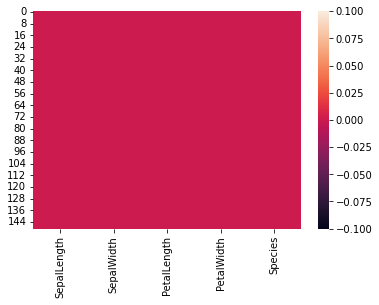

In [9]:
sns.heatmap(df.isnull())

In [10]:
df.duplicated().sum()

3

In [11]:
df.drop_duplicates()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica


Now dataset is free from missing and duplicate values

## EDA

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


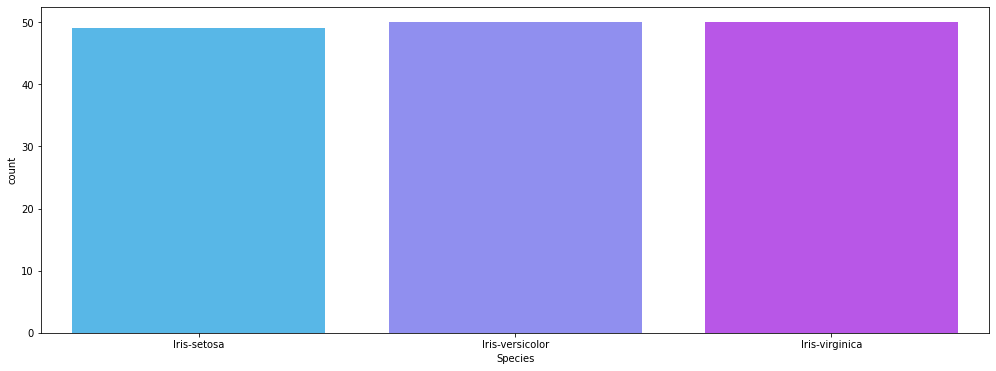

In [12]:
plt.figure(figsize=(17,6))
sns.countplot(df.Species,palette='cool');

In [13]:
df.columns

Index(['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species'], dtype='object')

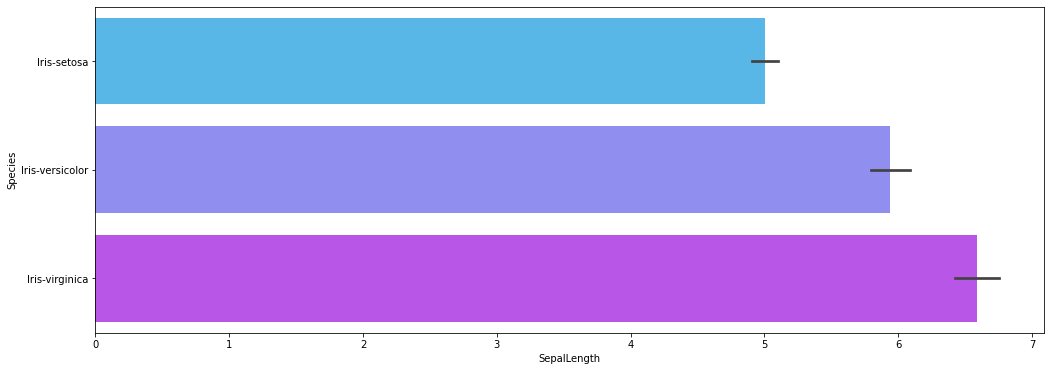

In [14]:
plt.figure(figsize=(17,6))
sns.barplot(x='SepalLength',y='Species',data=df,palette='cool')
plt.show()

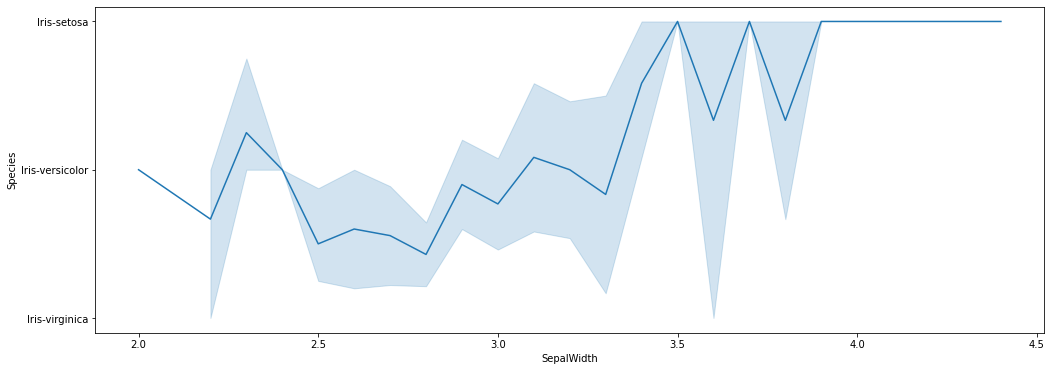

In [15]:
plt.figure(figsize=(17,6))
sns.lineplot(x='SepalWidth',y='Species',data=df,palette='cool')
plt.show()

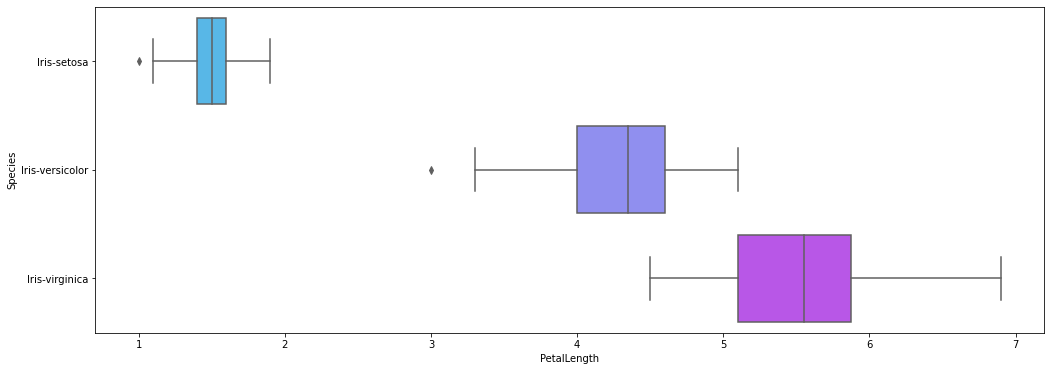

In [16]:
plt.figure(figsize=(17,6))
sns.boxplot(x='PetalLength',y='Species',data=df,palette='cool')
plt.show()

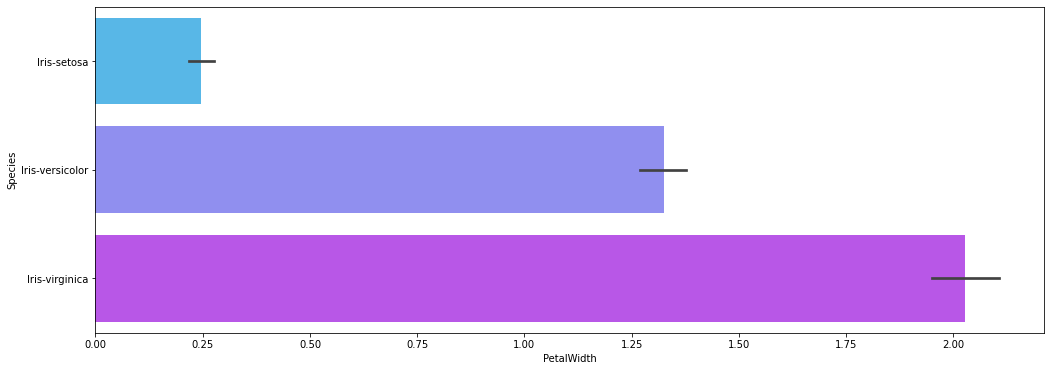

In [17]:
plt.figure(figsize=(17,6))
sns.barplot(x='PetalWidth',y='Species',data=df,palette='cool')
plt.show()

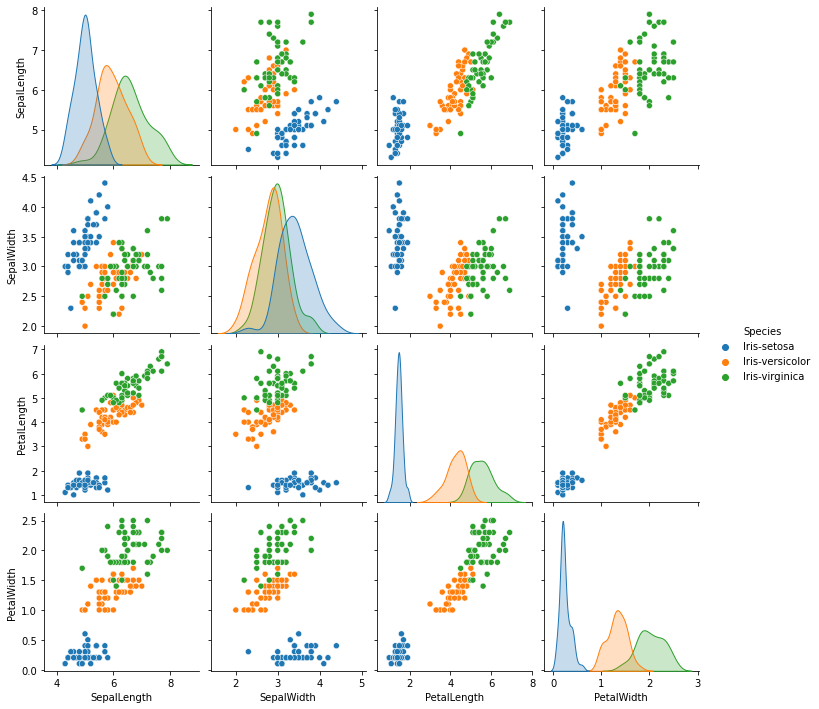

In [18]:
sns.pairplot(df,hue='Species')

## Data preprocessing

In [19]:
# Seperating independant and dependant variables
X= df.drop(columns=['Species'],axis=1)
y=df['Species']

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)

In [21]:
print(X_train.shape,y_train.shape)

(111, 4) (111,)


## Model buliding

### Logistic regression

In [22]:
lgr = LogisticRegression()
lgr.fit(X_train,y_train)
lgr_pred = lgr.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [23]:
y_test_pred = lgr.predict(X_test)
y_train_pred = lgr.predict(X_train)

In [24]:
print("Training Accuracy : ", accuracy_score(y_train, y_train_pred))
print("Test Accuracy : ", accuracy_score(y_test, y_test_pred))

Training Accuracy :  0.963963963963964
Test Accuracy :  0.9736842105263158


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


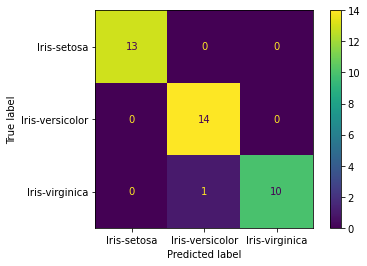

In [26]:
plot_confusion_matrix(lgr,X_test,y_test)

### Random forest classifier

In [27]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [28]:
rf_pred= rf.predict(X_test)

In [29]:
print(" Accuracy : ", accuracy_score(y_test, rf_pred))

 Accuracy :  0.9736842105263158


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


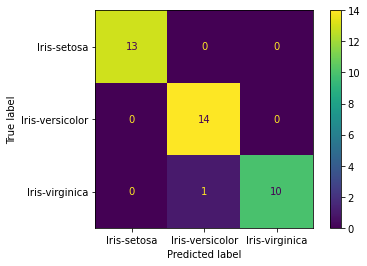

In [30]:
plot_confusion_matrix(rf,X_test,y_test)

### Decision tree

In [31]:
dt =DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [32]:
dt_pred = dt.predict(X_test)

In [35]:
print('Dt score:',accuracy_score(y_test,dt_pred))

Dt score: 0.9736842105263158


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


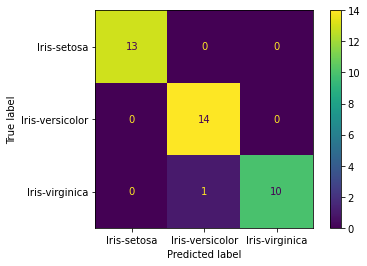

In [37]:
plot_confusion_matrix(dt,X_test,y_test)

Here, Random forest gives us best  accuracy score of 97%